# 1. IMPORTATIONS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. LECTURE DE FICHIER

In [2]:
# Lecture du fichier excel
df = pd.read_excel('Dataset_Z24739_Z1.xlsx')

# Conversion du fichier excel en format csv pour affichage visuel du tableau sous JupyterLab par double clic sur le fichier
df.to_csv("Dataset_Z24739.csv", index=False, encoding="utf-8")

# Convertir en format datetime
df["Heure"] = pd.to_datetime(df["Heure"])

# Définir l'origine du temps (ex : premier timestamp)
start_time = df["Heure"].min()

# Calculer le temps en secondes depuis le début
df["Secondes"] = (df["Heure"] - start_time).dt.total_seconds()

# Redéfinir la colonne des secondes comme clé primaire
df.set_index("Secondes")

# Nettoyage de la dataset en supprimant les 14 dernières valeurs
df.drop(df.tail(14).index, inplace=True)

# 3. AFFICHAGE GRAPHIQUE

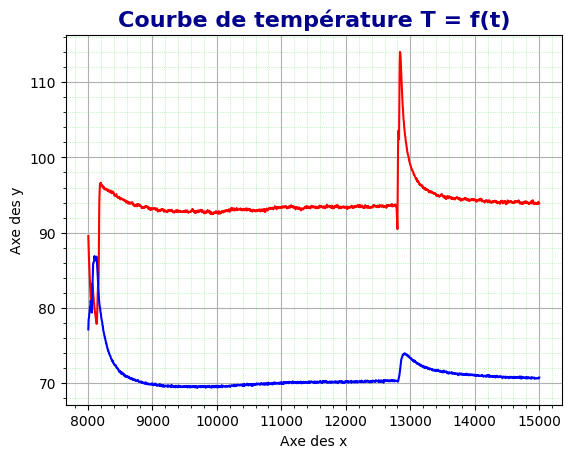

<Figure size 640x480 with 0 Axes>

In [3]:
debut = 8000
fin = 15000

x = df.Secondes[int((debut+5)/5):int((fin+5)/5)]
y = df["01 PV (°C)"][int((debut+5)/5):int((fin+5)/5)]
z = df["05 GV (°C)"][int((debut+5)/5):int((fin+5)/5)]
# Tracé de la courbe en trait plein
plt.plot(x, y, linewidth=1.5, color="red")
plt.plot(x, z, linewidth=1.5, color="blue")
# Tracé des points de la courbe
#plt.scatter(x, y, color="red")
# Titre de la courbe et axes
plt.title("Courbe de température T = f(t)", fontsize=16, fontweight='bold', color='darkblue')
# plt.axis("equal") # Pour définir un repère orthonormé
plt.xlabel("Axe des x")
plt.ylabel("Axe des y")
#plt.xlim(a,b)
#plt.ylim(0,1)
plt.grid()

plt.grid(which='major', linewidth=0.8)  # Grille principale
plt.minorticks_on()  # Activer les graduations secondaires
plt.grid(which='minor', color='lightgreen', linestyle=':', linewidth=0.5)  # Grille secondaire plus fine
plt.figure(facecolor='k')

# Sauvegarde de la figure
plt.savefig("PT.png")

# Affichage de la figure
plt.show()

# 4. FIN SCRIPT

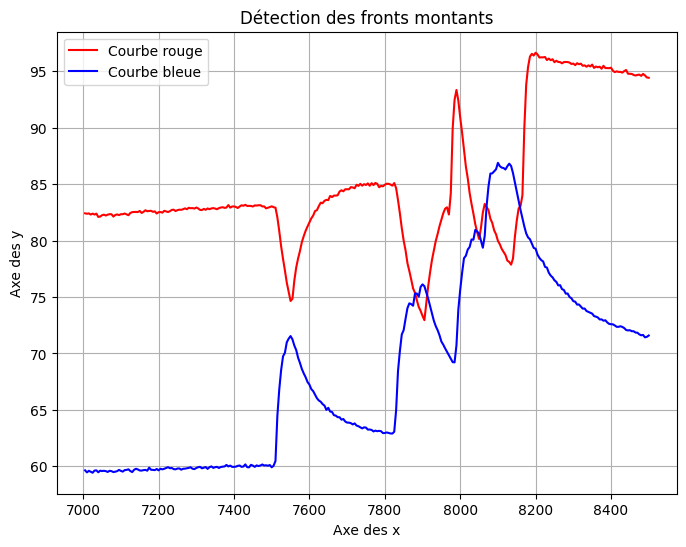

Nombre de fronts montants (courbe rouge) : 2
Nombre de fronts montants (courbe bleue) : 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Génération de données fictives (à remplacer par tes données réelles)

debut = 7000
fin = 8500

x = df.Secondes[int((debut+5)/5):int((fin+5)/5)]
y1 = df["01 PV (°C)"][int((debut+5)/5):int((fin+5)/5)]
y2 = df["05 GV (°C)"][int((debut+5)/5):int((fin+5)/5)]


# Ajout d'un pic pour simuler un front montant
#y1[300] += 15
#y2[700] += 10
#y2[400] += 10

# Calcul de la dérivée discrète
dy1 = np.diff(y1)
dy2 = np.diff(y2)

# Détection des fronts montants (pics dans la dérivée)
seuil = 4  # Ajuste ce seuil selon tes données pour détecter les fronts
peaks1, _ = find_peaks(dy1, height=seuil)
peaks2, _ = find_peaks(dy2, height=seuil)

# Affichage des résultats
plt.figure(figsize=(8, 6))
plt.plot(x, y1, 'r', label='Courbe rouge')
plt.plot(x, y2, 'b', label='Courbe bleue')

# Marquer les fronts montants détectés
#plt.scatter(x[peaks1], y1[peaks1], color='black', marker='o', label="Fronts rouges")
#plt.scatter(x[peaks2], y2[peaks2], color='cyan', marker='o', label="Fronts bleus")

plt.xlabel("Axe des x")
plt.ylabel("Axe des y")
plt.title("Détection des fronts montants")
plt.legend()
plt.grid()
plt.show()

# Affichage des nombres de fronts détectés
print(f"Nombre de fronts montants (courbe rouge) : {len(peaks1)}")
print(f"Nombre de fronts montants (courbe bleue) : {len(peaks2)}")

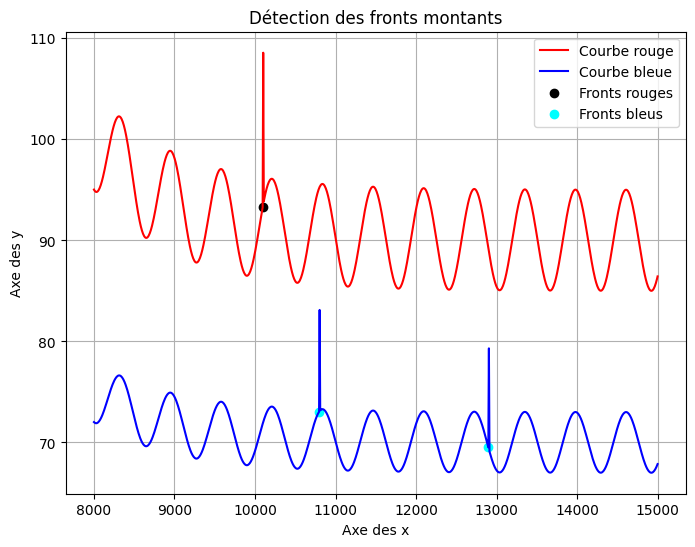

Nombre de fronts montants (courbe rouge) : 1
Nombre de fronts montants (courbe bleue) : 2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Génération de données fictives (à remplacer par tes données réelles)
x = np.linspace(8000, 15000, 1000)  # Exemple d'axe des X
y1 = 90 + 10 * np.exp(-0.001 * (x - 8000)) + 5 * np.sin(0.01 * x)  # Courbe rouge
y2 = 70 + 5 * np.exp(-0.001 * (x - 8000)) + 3 * np.sin(0.01 * x)  # Courbe bleue

# Ajout d'un pic pour simuler un front montant
y1[300] += 15
y2[700] += 10
y2[400] += 10

# Calcul de la dérivée discrète
dy1 = np.diff(y1)
dy2 = np.diff(y2)

# Détection des fronts montants (pics dans la dérivée)
seuil = 4  # Ajuste ce seuil selon tes données pour détecter les fronts
peaks1, _ = find_peaks(dy1, height=seuil)
peaks2, _ = find_peaks(dy2, height=seuil)

# Affichage des résultats
plt.figure(figsize=(8, 6))
plt.plot(x, y1, 'r', label='Courbe rouge')
plt.plot(x, y2, 'b', label='Courbe bleue')

# Marquer les fronts montants détectés
plt.scatter(x[peaks1], y1[peaks1], color='black', marker='o', label="Fronts rouges")
plt.scatter(x[peaks2], y2[peaks2], color='cyan', marker='o', label="Fronts bleus")

plt.xlabel("Axe des x")
plt.ylabel("Axe des y")
plt.title("Détection des fronts montants")
plt.legend()
plt.grid()
plt.show()

# Affichage des nombres de fronts détectés
print(f"Nombre de fronts montants (courbe rouge) : {len(peaks1)}")
print(f"Nombre de fronts montants (courbe bleue) : {len(peaks2)}")


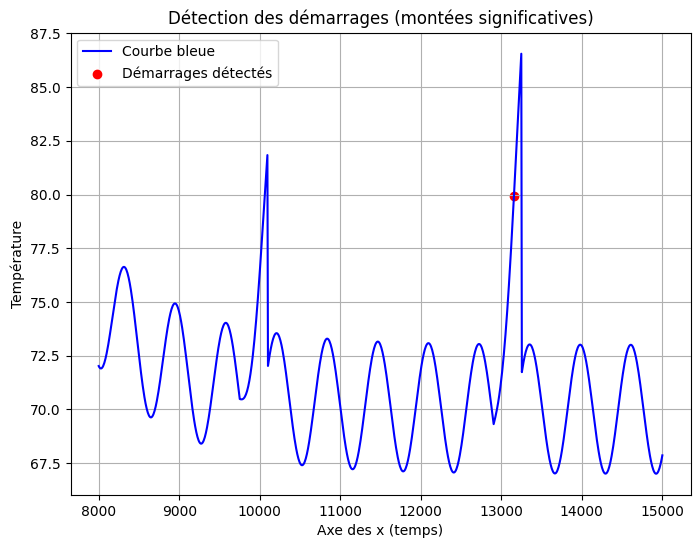

Nombre de montées significatives détectées : 1


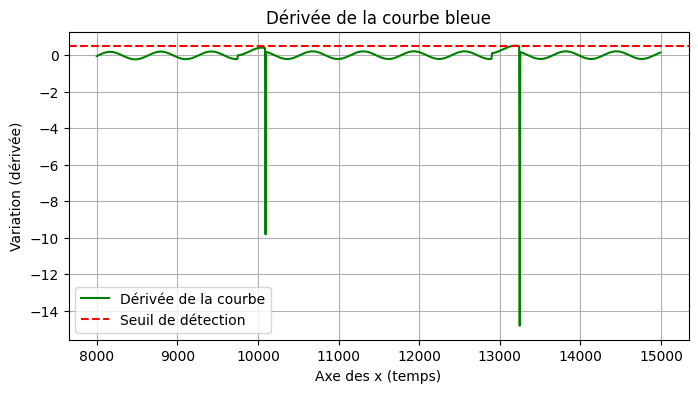

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Génération de données fictives (à remplacer par tes données réelles)
x = np.linspace(8000, 15000, 1000)  # Exemple d'axe des X (temps)
y2 = 70 + 5 * np.exp(-0.001 * (x - 8000)) + 3 * np.sin(0.01 * x)  # Courbe bleue

# Ajout de deux montées significatives simulant des redémarrages du moteur
y2[250:300] += np.linspace(0, 10, 50)  # 1er démarrage
y2[700:750] += np.linspace(0, 15, 50)  # 2ème démarrage

# Paramètres ajustables
duree_min = 10  # Durée minimale d'une montée (en points)
seuil_montee = 0.5  # Seuil de variation de la pente

# Calcul de la pente (dérivée discrète)
dy2 = np.diff(y2)

# Vérifier si la dérivée contient des montées significatives
indices_montees = np.where(dy2 > seuil_montee)[0]

if indices_montees.size == 0:
    print("Aucune montée significative détectée. Ajuste le seuil_montee.")
else:
    # Regroupement des indices proches pour détecter des montées continues
    montees = []
    debut = indices_montees[0]

    for i in range(1, len(indices_montees)):
        if indices_montees[i] > indices_montees[i-1] + 1:  # Nouvelle montée détectée
            if indices_montees[i-1] - debut >= duree_min:
                montees.append(debut)  # On stocke le début de la montée
            debut = indices_montees[i]  # Nouveau début de montée

    # Vérification de la dernière montée
    if indices_montees[-1] - debut >= duree_min:
        montees.append(debut)

    # Affichage des résultats
    plt.figure(figsize=(8, 6))
    plt.plot(x, y2, 'b', label='Courbe bleue')

    # Marquer les débuts de montées détectées
    plt.scatter(x[montees], y2[montees], color='red', marker='o', label="Démarrages détectés")

    plt.xlabel("Axe des x (temps)")
    plt.ylabel("Température")
    plt.title("Détection des démarrages (montées significatives)")
    plt.legend()
    plt.grid()
    plt.show()

    # Affichage du nombre de montées détectées
    print(f"Nombre de montées significatives détectées : {len(montees)}")

    # Affichage de la dérivée pour aider au réglage du seuil
    plt.figure(figsize=(8, 4))
    plt.plot(x[:-1], dy2, 'g', label="Dérivée de la courbe")
    plt.axhline(seuil_montee, color='r', linestyle='--', label="Seuil de détection")
    plt.xlabel("Axe des x (temps)")
    plt.ylabel("Variation (dérivée)")
    plt.title("Dérivée de la courbe bleue")
    plt.legend()
    plt.grid()
    plt.show()
